In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.signal import find_peaks
from tabulate import tabulate
import sys
import os
import pandas as pd

In [10]:
#Function definitions
#Import theoretical spectra. Names follow the convention "molecule form wide functional"
#molecule='68'
#form='closed'
#functional=['pbe0','pbe0-d3']
def read_theo(mol,f,fun):
    script_dir = os.getcwd()
    filename=mol+' '+f+" wide "+fun+'.txt'
#Relative path to directory with theoretical spectra e.g. 0068_closed
    rel_path='00'+mol+'_'+f+'/'
    path=os.path.join(script_dir,rel_path)
    theo_spec=genfromtxt(path+filename, delimiter='     ',dtype=float)
    return theo_spec
#Theoretical peak detection
def theo_peaks(SF,wavenumbers_theo,heights_theo):
    D=8
    peaks_theo, _ = find_peaks(heights_theo,height=H,threshold=T,distance=D)
    return peaks_theo
#error calculation
#Calculate errors
def calculate_MAE():
    print("Error calculation:")

    #tolerance
    tol=100.0

    error=[]
    j=0
    #print(range(len(y)))
    #print(range(len(y_theo)))
    assigned=[]
    assigned_theo_number=[]
    assigned_exp_number=[]
    for i in range(len(y)):
     #   print(i)
        while True:
  #          if y[i]<500:
   #             break
            if j==len(y_theo)-1:
                print("End of theoretical spectrum")
                break
   #         elif i==len(y)-1:
    #            print("End of experimental spectrum")
     #           break
            else:
                if y[i]-y_theo[j]>tol :
                    print((y[i]-y_theo[j],y[i],y_theo[j]))
                    print('error > ',tol,', skipping the predicted peak')
                    j=j+1
     #           print(heights[i])
     #           print(heights_theo[j])

                if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]):
                        error.append(y[i]-y_theo[j])
                        assigned.append([y[i],y_theo[j]])
                        assigned_theo_number.append(j)
                        assigned_exp_number.append(i) 
                        
         #               print("IF",(y[i]-y_theo[j],y[i],y_theo[j]))
    #                    print(heights[i])
   #                     print(heights_theo[j])
                        j=j+1
                        break
                else:
                        j=j+1
             #           print("ELSE",(y[i]-y_theo[j],y[i],y_theo[j]))
               #         print((y[i]-y_theo[j+1],y[i],y_theo[j+1]))

#                        error.append(y[i]-y_theo[j])
#                        assigned.append([y[i],y_theo[j]])
#                print(i,j)

 #   print(assigned_theo_number)
 #   print(assigned_exp_number)
#print(heights)
#print(heights_theo)
    print("\n {} peaks were assigned. Scaling factor of {} was used for the theoretical spectrum.\n".format(len(error),SF))
  #  t=[range(len(error)),assigned[0], assigned [1],[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number]]
  #  df=pd.DataFrame(assigned,[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number],["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"])
    df=pd.DataFrame(assigned,columns=["Exp. waveno. "," Scaled theo. waveno."])
 #   df["Theor. unscaled waveno"]=[i/SF for i in assigned[1]]
    df["Exp. peak height"]=[h_exp[i] for i in assigned_exp_number]
    df["Theo. peak height"]=[h_theo[i] for i in assigned_theo_number]
    df['Deviations']=df['Theo. peak height']-df["Exp. peak height"]
    display(df)
 #   table=tabulate(transposedT,headers= ["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"],tablefmt='simple')
 #   print(table)
   # print("   |Exp. waveno. | Scaled theor. waveno. |  Theor. unscaled waveno | cm-1|   Exp. peak height (normalized) | Theor. peak height (normalized)")
 #   k=0
#    for i in assigned:
 #       w=assigned_exp_number[k]
 #       v=assigned_theo_number[k]
 #       print(k," | ",i[0]," | ",i[1],"         | ", i[1]/SF," |    |",h_exp[w],"         | ",h_theo[v])
  #      k=k+1

    print("\n Mean absolute error: \n")
    MAE=   sum(abs(i) for i in error)/len(error)
    print("MAE = {} cm-1".format(round(MAE,2)))
    return MAE,len(error)


In [11]:
script_dir = os.getcwd()
np.set_printoptions(precision=6,threshold=sys.maxsize)

In [12]:
#set parameters
H=0.02
T=0.0
D=8
#experimental resolution
res=8.0

In [13]:
#Input data parameters
# Names of theoretical spectra files follow the convention "molecule form wide functional"
molecule='68'
form='closed'
functional=["pbe0","pbe0-d3",'b3lyp', 'b3lyp-d3', 'cam-b3lyp', 'cam-b3lyp-d3','m06l','wb97-xd']
#scaling factors for given functionals
scaling_f={'pbe0':0.989, 'pbe0-d3':0.989, 'b3lyp': 0.959, 'b3lyp-d3': 0.959, 'cam-b3lyp': 0.951, 'cam-b3lyp-d3': 0.951,'m06l': 0.951, 'wb97-xd': 0.95}


In [14]:
#Read in the experimental data for the selected molecule
#Data  in two columns without headers, separated by comma
exp_spec = genfromtxt('/Users/Ewa 1/Dropbox/Sheet1.csv', delimiter=',',dtype=float)
wavenumbers=exp_spec[:,0]
heights=exp_spec[:,1]/max(exp_spec[:,1])
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
peaks, _ = find_peaks(heights,height=H,threshold=T,distance=D)
y=[wavenumbers[j] for j in peaks]
h_exp=[heights[j] for j in peaks]
print("Peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y)
no_of_peaks=len(y)
print("{} peaks fulfilling the criteria in experimental spectrum".format(no_of_peaks))

Peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[555.4258, 615.2113, 738.6393, 806.1389, 851.4601, 933.424, 978.7452, 986.4595, 1061.673, 1133.995, 1182.208, 1192.816, 1274.78, 1303.708, 1336.494, 1365.422, 1443.529, 1594.921, 1653.742, 2925.629]
20 peaks fulfilling the criteria in experimental spectrum


pbe0
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[517.247, 566.697, 574.609, 630.982, 654.718, 758.563, 806.035, 835.705, 867.353, 946.473, 980.099, 1003.835, 1021.637, 1096.801, 1123.504, 1149.218, 1176.91, 1188.778, 1213.503, 1231.305, 1256.03, 1282.733, 1343.062, 1360.864, 1386.578, 1425.149, 1440.973, 1675.366, 1709.981, 1720.86, 1728.772, 3021.395, 3030.296, 3103.482, 3139.086]


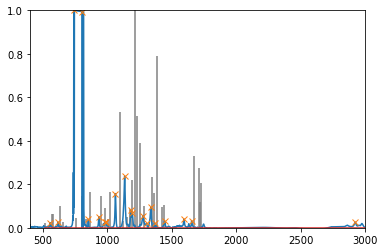

Error calculation:
(1204.769, 2925.629, 1720.86)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.989 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,566.70,0.02,0.06,3.95e-02
1,615.21,630.98,0.03,0.10,7.24e-02
2,738.64,758.56,1.00,0.04,-9.57e-01
3,806.14,806.03,0.99,0.14,-8.49e-01
4,851.46,835.71,0.04,0.04,-3.46e-04
5,933.42,946.47,0.05,0.14,9.35e-02
6,978.75,980.10,0.03,0.09,6.18e-02
7,986.46,1003.84,0.03,0.04,1.11e-02
8,1061.67,1096.80,0.16,0.53,3.77e-01
9,1133.99,1123.50,0.24,0.03,-2.07e-01



 Mean absolute error: 

MAE = 23.87 cm-1
23.86984499999999 20
pbe0-d3
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[326.37, 461.863, 541.972, 558.785, 571.6419999999999, 616.147, 703.179, 785.266, 800.101, 865.375, 888.122, 902.957, 931.638, 944.495, 957.352, 967.242, 1015.703, 1052.296, 1063.175, 1092.845, 1108.669, 1130.427, 1191.745, 1216.47, 1230.316, 1254.052, 1268.887, 1280.7549999999999, 1289.656, 1311.414, 1328.227, 1372.732, 1385.589, 1398.446, 1432.072, 1453.83, 1471.632, 1514.1589999999999, 1575.477, 1590.312, 1649.652, 1671.41, 1699.102, 3027.329, 3043.153, 3123.262, 3167.767, 3197.437, 3213.261]


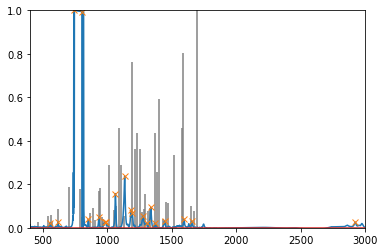

Error calculation:
(229.05579999999998, 555.4258, 326.37)
error >  100.0 , skipping the predicted peak
(123.28899999999999, 1594.921, 1471.632)
error >  100.0 , skipping the predicted peak
(1254.2189999999998, 2925.629, 1671.41)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.989 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,558.78,0.02,0.06,3.48e-02
1,615.21,616.15,0.03,0.09,5.88e-02
2,738.64,703.18,1.00,0.19,-8.14e-01
3,806.14,800.10,0.99,0.05,-9.46e-01
4,851.46,865.38,0.04,0.07,2.90e-02
5,933.42,931.64,0.05,0.17,1.20e-01
6,978.75,967.24,0.03,0.04,1.31e-02
7,986.46,1015.70,0.03,0.29,2.59e-01
8,1061.67,1063.17,0.16,0.10,-5.92e-02
9,1133.99,1130.43,0.24,0.05,-1.86e-01



 Mean absolute error: 

MAE = 14.52 cm-1
14.518884999999983 20
b3lyp
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[421.001, 497.721, 540.876, 549.507, 580.1949999999999, 600.334, 610.8829999999999, 658.833, 724.045, 767.1999999999999, 780.626, 800.765, 824.74, 909.132, 940.779, 953.246, 971.467, 1005.0319999999999, 1043.392, 1068.326, 1085.588, 1101.8909999999998, 1126.825, 1141.21, 1163.267, 1179.57, 1223.684, 1271.634, 1306.158, 1328.215, 1338.764, 1384.796, 1398.222, 1590.022, 1629.341, 1646.6029999999998, 2902.893, 2921.114, 2968.105, 3005.506, 3057.292]


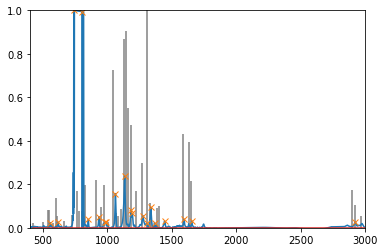

Error calculation:
(134.4248, 555.4258, 421.001)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.959 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,549.51,0.02,0.08,5.77e-02
1,615.21,610.88,0.03,0.05,2.71e-02
2,738.64,724.04,1.00,0.06,-9.41e-01
3,806.14,800.76,0.99,0.08,-9.16e-01
4,851.46,824.74,0.04,0.20,1.58e-01
5,933.42,940.78,0.05,0.05,-4.84e-03
6,978.75,971.47,0.03,0.20,1.72e-01
7,986.46,1005.03,0.03,0.03,-3.32e-03
8,1061.67,1068.33,0.16,0.07,-8.83e-02
9,1133.99,1126.83,0.24,0.87,6.32e-01



 Mean absolute error: 

MAE = 11.33 cm-1
11.328505000000002 20
b3lyp-d3
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[423.878, 498.68, 540.876, 551.425, 584.031, 601.293, 612.8009999999999, 662.669, 725.963, 769.1179999999999, 781.5849999999999, 802.683, 831.453, 914.886, 946.533, 956.1229999999999, 973.385, 1005.991, 1045.31, 1071.203, 1089.424, 1099.973, 1127.7839999999999, 1144.087, 1166.144, 1176.693, 1226.561, 1245.741, 1273.552, 1309.0349999999999, 1333.01, 1384.796, 1398.222, 1596.735, 1632.2179999999998, 1643.7259999999999, 1651.398, 2900.016, 2918.237, 2967.1459999999997, 3005.506, 3058.2509999999997]


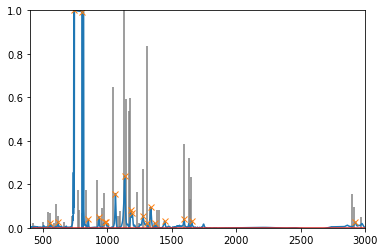

Error calculation:
(131.5478, 555.4258, 423.878)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.959 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,551.42,0.02,0.07,4.56e-02
1,615.21,612.80,0.03,0.05,2.78e-02
2,738.64,725.96,1.00,0.05,-9.45e-01
3,806.14,802.68,0.99,0.07,-9.27e-01
4,851.46,831.45,0.04,0.17,1.33e-01
5,933.42,946.53,0.05,0.04,-9.30e-03
6,978.75,973.38,0.03,0.16,1.32e-01
7,986.46,1005.99,0.03,0.02,-6.41e-03
8,1061.67,1071.20,0.16,0.06,-1.02e-01
9,1133.99,1127.78,0.24,1.00,7.62e-01



 Mean absolute error: 

MAE = 11.09 cm-1
11.091104999999988 20
cam-b3lyp
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[501.17699999999996, 545.874, 556.3349999999999, 607.689, 619.101, 732.27, 776.967, 791.232, 809.3009999999999, 835.929, 917.7149999999999, 950.049, 971.9219999999999, 989.04, 1009.011, 1059.414, 1086.042, 1114.572, 1146.906, 1172.5829999999999, 1188.75, 1211.5739999999998, 1243.908, 1303.821, 1340.9099999999999, 1381.8029999999999, 1394.166, 1635.72, 1661.397, 1670.907, 1685.172, 2907.207, 2918.6189999999997, 2978.5319999999997, 3009.915]


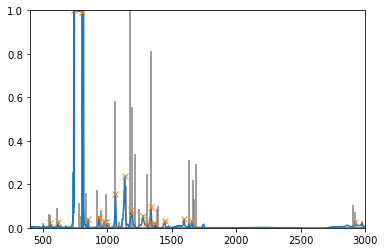

Error calculation:
(1240.4569999999999, 2925.629, 1685.172)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.951 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,556.33,0.02,0.06,3.76e-02
1,615.21,619.10,0.03,0.03,5.64e-03
2,738.64,732.27,1.00,0.04,-9.56e-01
3,806.14,809.30,0.99,0.07,-9.24e-01
4,851.46,835.93,0.04,0.16,1.20e-01
5,933.42,917.71,0.05,0.17,1.20e-01
6,978.75,971.92,0.03,0.03,2.45e-03
7,986.46,989.04,0.03,0.16,1.29e-01
8,1061.67,1059.41,0.16,0.58,4.26e-01
9,1133.99,1146.91,0.24,0.19,-4.55e-02



 Mean absolute error: 

MAE = 25.93 cm-1
25.92910499999997 20
cam-b3lyp-d3
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[501.17699999999996, 545.874, 558.237, 608.64, 620.052, 627.66, 733.221, 777.918, 793.134, 810.252, 839.733, 922.4699999999999, 952.9019999999999, 974.775, 989.991, 1009.011, 1061.316, 1086.993, 1117.425, 1138.347, 1149.759, 1173.5339999999999, 1191.6029999999998, 1210.623, 1246.761, 1305.723, 1341.8609999999999, 1381.8029999999999, 1395.117, 1639.524, 1663.299, 1673.76, 1688.9759999999999, 2905.305, 2917.6679999999997, 2978.5319999999997, 3008.964]


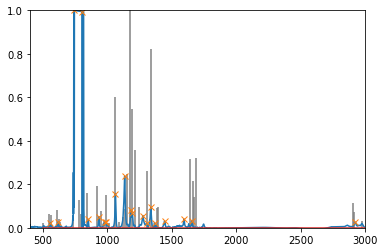

Error calculation:
(110.97930000000008, 738.6393, 627.66)
error >  100.0 , skipping the predicted peak
(1251.869, 2925.629, 1673.76)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.951 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,558.24,0.02,0.06,3.71e-02
1,615.21,620.05,0.03,0.04,1.37e-02
2,738.64,733.22,1.00,0.05,-9.53e-01
3,806.14,810.25,0.99,0.07,-9.25e-01
4,851.46,839.73,0.04,0.16,1.23e-01
5,933.42,922.47,0.05,0.19,1.43e-01
6,978.75,974.77,0.03,0.03,5.05e-03
7,986.46,989.99,0.03,0.15,1.23e-01
8,1061.67,1061.32,0.16,0.60,4.43e-01
9,1133.99,1138.35,0.24,0.09,-1.52e-01



 Mean absolute error: 

MAE = 11.21 cm-1
11.213855000000013 20
m06l
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[421.293, 493.56899999999996, 536.3639999999999, 546.8249999999999, 598.179, 621.0029999999999, 656.1899999999999, 720.858, 756.045, 767.457, 795.036, 822.615, 900.597, 933.882, 970.971, 988.0889999999999, 1042.296, 1080.336, 1098.405, 1115.523, 1138.347, 1150.71, 1164.024, 1226.79, 1274.34, 1296.213, 1305.723, 1318.086, 1360.8809999999999, 1375.146, 1596.7289999999998, 1635.72, 1652.838, 2897.6969999999997, 2988.042, 3018.4739999999997, 3026.082, 3034.641]


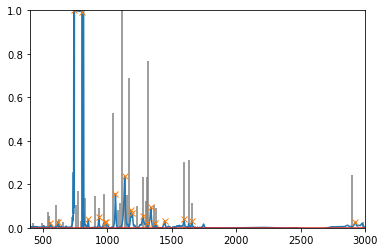

Error calculation:
(134.13279999999997, 555.4258, 421.293)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.951 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,546.82,0.02,0.06,3.27e-02
1,615.21,621.00,0.03,0.04,1.34e-02
2,738.64,756.04,1.00,0.10,-8.96e-01
3,806.14,795.04,0.99,0.03,-9.61e-01
4,851.46,822.62,0.04,0.14,9.72e-02
5,933.42,933.88,0.05,0.09,4.04e-02
6,978.75,970.97,0.03,0.16,1.28e-01
7,986.46,988.09,0.03,0.02,-8.07e-03
8,1061.67,1080.34,0.16,0.08,-7.68e-02
9,1133.99,1138.35,0.24,0.23,-1.11e-02



 Mean absolute error: 

MAE = 14.06 cm-1
14.060595000000001 20
wb97-xd
Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[498.75, 546.25, 554.8, 606.1, 617.5, 626.05, 730.55, 773.3, 782.8, 804.65, 836.0, 916.75, 946.1999999999999, 957.5999999999999, 970.9, 982.3, 1005.0999999999999, 1052.6, 1082.05, 1109.6, 1129.55, 1142.85, 1165.6499999999999, 1184.6499999999999, 1201.75, 1237.85, 1292.0, 1331.8999999999999, 1380.35, 1394.6, 1634.0, 1658.6999999999998, 1668.1999999999998, 1680.55, 2905.1, 2913.65, 2988.7, 3014.35]


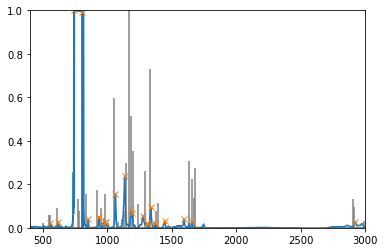

Error calculation:
(112.5893000000001, 738.6393, 626.05)
error >  100.0 , skipping the predicted peak
(1245.079, 2925.629, 1680.55)
error >  100.0 , skipping the predicted peak

 20 peaks were assigned. Scaling factor of 0.95 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,555.43,554.80,0.02,0.06,3.64e-02
1,615.21,617.50,0.03,0.03,2.52e-03
2,738.64,730.55,1.00,0.04,-9.61e-01
3,806.14,804.65,0.99,0.05,-9.40e-01
4,851.46,836.00,0.04,0.16,1.19e-01
5,933.42,946.20,0.05,0.09,3.83e-02
6,978.75,982.30,0.03,0.15,1.27e-01
7,986.46,1005.10,0.03,0.02,-8.61e-03
8,1061.67,1052.60,0.16,0.60,4.39e-01
9,1133.99,1129.55,0.24,0.08,-1.62e-01



 Mean absolute error: 

MAE = 24.35 cm-1
24.347554999999943 20
Calculated MAEs for each functional:


,MAE,No. of assigned peaks
pbe0,23.87,20
pbe0-d3,14.52,20
b3lyp,11.33,20
b3lyp-d3,11.09,20
cam-b3lyp,25.93,20
cam-b3lyp-d3,11.21,20
m06l,14.06,20
wb97-xd,24.35,20


In [15]:
#For selected functionals read the spectra and calculate the MAEs
MAEs={}
peaks_assigned={}
for funs in functional:
    print(funs)
    theo_spec=read_theo(molecule,form,funs) 
    SF=scaling_f[funs]
    
    wavenumbers_theo=SF*theo_spec[:,0]
    heights_theo=theo_spec[:,1]/max(theo_spec[:,1])
    
    peaks_theo=theo_peaks(SF,wavenumbers_theo,heights_theo)
    
    y_theo=[wavenumbers_theo[j] for j in peaks_theo]
    print("Theoretical peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
    print(y_theo)
    h_theo=[heights_theo[j] for j in peaks_theo]
    #print(h_theo)
    no_of_peaks=len(y_theo)
    
    #draw the spectra comparison
    plt.plot(wavenumbers,heights)
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=4000)
    plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
    plt.stem(y_theo, heights_theo[peaks_theo],markerfmt=' ',linefmt='grey')
#plt.stem(y_theo,heights[peaks_theo] ,markerfmt=' ',linefmt='grey')
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=3000)
    plt.show()
    m,n=calculate_MAE()
    MAEs[funs]=m
    peaks_assigned[funs]=n
    print(m,n)
    
pd.set_option('display.precision', 2)
print("Calculated MAEs for each functional:")
df=pd.DataFrame.from_dict(MAEs,orient='index',columns=['MAE'])
df['No. of assigned peaks']=peaks_assigned.values()

display(df)
#for funs in functional:
#    print(funs,MAEs[funs],peaks_assigned[funs])
    